In [54]:
import time
from matplotlib import pyplot as plt
import networkx as nx



In [55]:
transactions = [
    ['Футболка','Брюки','Куртка','Кроссовки','Сумка','Шапка','Джинсы','Рубашка'],
    ['Платье','Сумка','Шапка','Джинсы'],
    ['Футболка','Джинсы','Рубашка','Кроссовки'],
    ['Кроссовки','Куртка','Рубашка','Галстук','Сумка','Футболка'],
    ['Футболка','Брюки','Сумка','Джинсы'],
    ['Шапка','Кроссовки','Куртка','Джинсы'],
    ['Кроссовки','Джинсы','Рубашка','Галстук','Куртка'],
    ['Футболка','Брюки','Галстук','Джинсы'],
    ['Джинсы','Рубашка','Сумка','Футболка','Куртка'],
    ['Футболка','Сумка','Шапка','Куртка','Рубашка','Кроссовки','Джинсы','Брюки'],
    ['Галстук','Футболка','Брюки'],
    ['Сумка','Футболка','Джинсы','Шапка'],
    ['Рубашка','Сумка','Куртка'],
    ['Рубашка','Куртка','Галстук','Кроссовки'],
    ['Куртка','Джинсы','Футболка','Сумка','Брюки'],
    ['Футболка','Брюки','Рубашка','Галстук','Джинсы'],
    ['Куртка','Футболка','Джинсы','Кроссовки'],
    ['Футболка','Кроссовки','Куртка','Сумка'],
    ['Сумка','Галстук','Брюки'],
    ['Футболка','Рубашка','Джинсы','Шапка','Куртка']
]

total_transactions = len(transactions)

In [56]:
times = {}

min_sup = 0.25

In [57]:
def draw_rules_graph(rules, title="Ассоциативные правила"):
    G = nx.DiGraph()
    for r in rules:
        ant = ", ".join(r['antecedent'])
        cons = ", ".join(r['consequent'])
        support = r.get('support', None)
        confidence = r['confidence']
        if support is not None:
            G.add_edge(ant, cons, weight=confidence, support=support)
        else:
            G.add_edge(ant, cons, weight=confidence)

    pos = nx.spring_layout(G, k=0.5)
    plt.figure(figsize=(12, 8))
    nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=1500)
    nx.draw_networkx_labels(G, pos, font_size=10)

    edges = G.edges(data=True)
    weights = [d['weight'] * 5 for (_, _, d) in edges]
    nx.draw_networkx_edges(G, pos, edgelist=edges, width=weights, arrows=True, arrowstyle='-|>')

    plt.title(title)
    plt.axis('off')
    plt.show()

apriori


Ассоциативные правила (достоверность ≥ 60%):
[{'Брюки'}, {'Сумка'}, 0.625]
[{'Куртка', 'Рубашка'}, {'Сумка'}, 0.625]
[{'Джинсы', 'Куртка'}, {'Кроссовки'}, 0.625]
[{'Куртка', 'Кроссовки'}, {'Джинсы'}, 0.625]
[{'Джинсы', 'Куртка'}, {'Рубашка'}, 0.625]
[{'Куртка', 'Рубашка'}, {'Джинсы'}, 0.625]
[{'Куртка', 'Рубашка'}, {'Кроссовки'}, 0.625]
[{'Куртка', 'Кроссовки'}, {'Рубашка'}, 0.625]
[{'Футболка', 'Куртка'}, {'Рубашка'}, 0.625]
[{'Куртка', 'Рубашка'}, {'Футболка'}, 0.625]
[{'Футболка', 'Куртка'}, {'Кроссовки'}, 0.625]
[{'Куртка', 'Кроссовки'}, {'Футболка'}, 0.625]
[{'Сумка'}, {'Куртка'}, 0.6363636363636364]
[{'Сумка'}, {'Джинсы'}, 0.6363636363636364]
[{'Куртка'}, {'Джинсы'}, 0.6666666666666666]
[{'Куртка'}, {'Кроссовки'}, 0.6666666666666666]
[{'Куртка'}, {'Рубашка'}, 0.6666666666666666]
[{'Кроссовки'}, {'Футболка'}, 0.6666666666666666]
[{'Кроссовки'}, {'Джинсы'}, 0.6666666666666666]
[{'Кроссовки'}, {'Рубашка'}, 0.6666666666666666]
[{'Куртка'}, {'Футболка'}, 0.6666666666666666]
[{'Рубашк

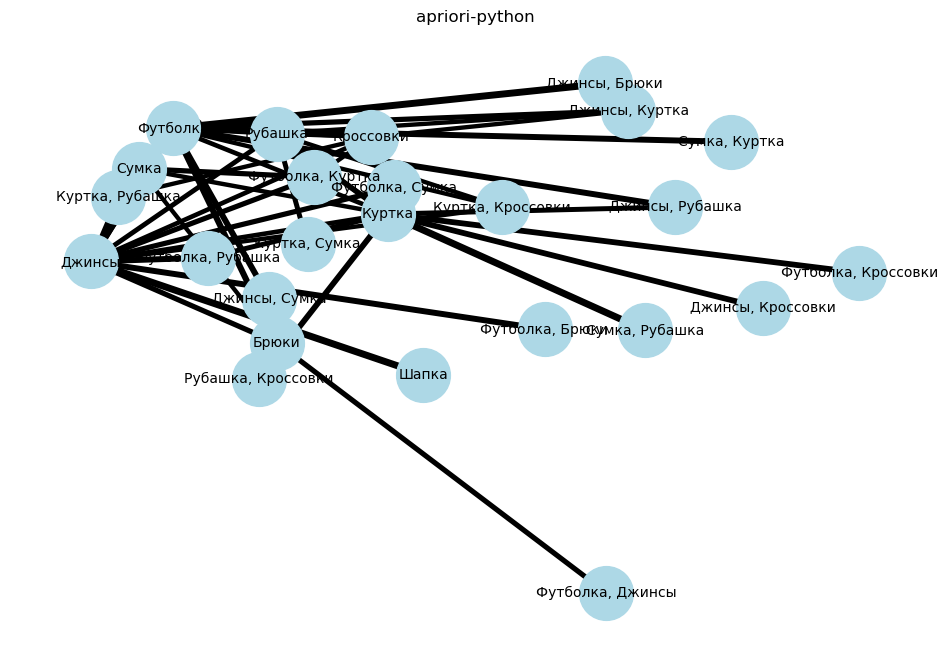

In [58]:
from apriori_python import apriori
start = time.time()
freqItemSet, rules = apriori(transactions, minSup=min_sup, minConf=0.6)
times['apriori-python'] = time.time() - start

print("\nАссоциативные правила (достоверность ≥ 60%):")
for rule in rules:
    print(rule)

rules_data_ap = []
for r in rules:
    print(r)
    lhs = r[0]
    rhs = r[1]
    conf = r[2]
    rules_data_ap.append({
        'antecedent': tuple(lhs),
        'consequent': tuple(rhs),
        'confidence': conf
    })

draw_rules_graph(rules_data_ap, title="apriori-python")


Ассоциативные правила (достоверность ≥ 80%):
[{'Джинсы', 'Кроссовки'}, {'Куртка'}, 0.8333333333333334]
[{'Рубашка', 'Кроссовки'}, {'Куртка'}, 0.8333333333333334]
[{'Футболка', 'Кроссовки'}, {'Куртка'}, 0.8333333333333334]
[{'Джинсы', 'Сумка'}, {'Футболка'}, 0.8571428571428571]
[{'Футболка', 'Рубашка'}, {'Джинсы'}, 0.8571428571428571]
[{'Джинсы', 'Рубашка'}, {'Футболка'}, 0.8571428571428571]
[{'Сумка', 'Куртка'}, {'Футболка'}, 0.8571428571428571]
[{'Футболка', 'Брюки'}, {'Джинсы'}, 0.8571428571428571]
[{'Брюки'}, {'Футболка'}, 0.875]
[{'Кроссовки'}, {'Куртка'}, 0.8888888888888888]
[{'Шапка'}, {'Джинсы'}, 1.0]
[{'Сумка', 'Рубашка'}, {'Куртка'}, 1.0]
[{'Джинсы', 'Брюки'}, {'Футболка'}, 1.0]
[{'Джинсы', 'Кроссовки'}, {'Куртка'}, 0.8333333333333334]
[{'Рубашка', 'Кроссовки'}, {'Куртка'}, 0.8333333333333334]
[{'Футболка', 'Кроссовки'}, {'Куртка'}, 0.8333333333333334]
[{'Джинсы', 'Сумка'}, {'Футболка'}, 0.8571428571428571]
[{'Футболка', 'Рубашка'}, {'Джинсы'}, 0.8571428571428571]
[{'Джинсы',

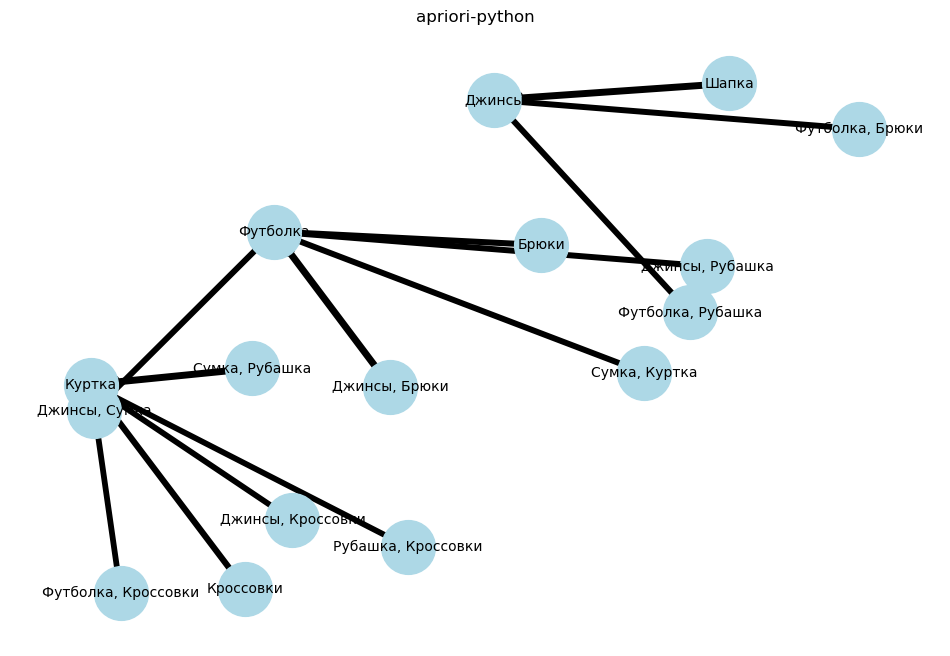

In [59]:
freqItemSet, rules = apriori(transactions, minSup=min_sup, minConf=0.8)

print("\nАссоциативные правила (достоверность ≥ 80%):")
for rule in rules:
    print(rule)

rules_data_ap = []
for r in rules:
    print(r)
    lhs = r[0]
    rhs = r[1]
    conf = r[2]
    rules_data_ap.append({
        'antecedent': tuple(lhs),
        'consequent': tuple(rhs),
        'confidence': conf
    })

draw_rules_graph(rules_data_ap, title="apriori-python")


efficient_apriori


Ассоциативные правила (достоверность ≥ 60%):
{Брюки} -> {Джинсы} (conf: 0.750, supp: 0.300, lift: 1.071, conv: 1.200)
{Брюки} -> {Сумка} (conf: 0.625, supp: 0.250, lift: 1.136, conv: 1.200)
{Брюки} -> {Футболка} (conf: 0.875, supp: 0.350, lift: 1.250, conv: 2.400)
{Кроссовки} -> {Джинсы} (conf: 0.667, supp: 0.300, lift: 0.952, conv: 0.900)
{Куртка} -> {Джинсы} (conf: 0.667, supp: 0.400, lift: 0.952, conv: 0.900)
{Рубашка} -> {Джинсы} (conf: 0.700, supp: 0.350, lift: 1.000, conv: 1.000)
{Сумка} -> {Джинсы} (conf: 0.636, supp: 0.350, lift: 0.909, conv: 0.825)
{Футболка} -> {Джинсы} (conf: 0.786, supp: 0.550, lift: 1.122, conv: 1.400)
{Джинсы} -> {Футболка} (conf: 0.786, supp: 0.550, lift: 1.122, conv: 1.400)
{Шапка} -> {Джинсы} (conf: 1.000, supp: 0.300, lift: 1.429, conv: 300000000.000)
{Куртка} -> {Кроссовки} (conf: 0.667, supp: 0.400, lift: 1.481, conv: 1.650)
{Кроссовки} -> {Куртка} (conf: 0.889, supp: 0.400, lift: 1.481, conv: 3.600)
{Рубашка} -> {Кроссовки} (conf: 0.600, supp: 0.3

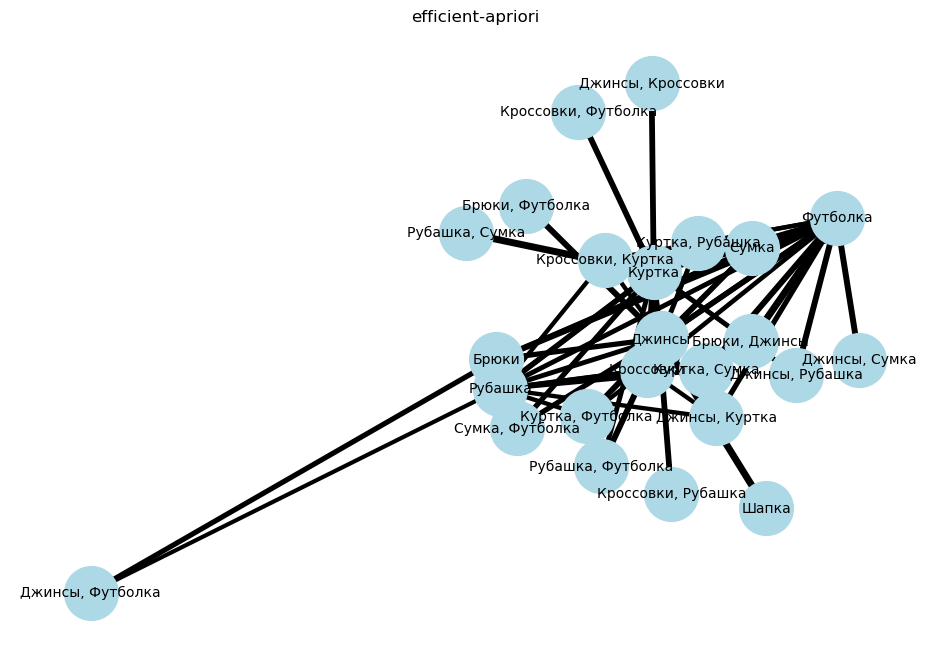

In [60]:
from efficient_apriori import apriori
start = time.time()
itemsets, rules = apriori(transactions, min_support=min_sup, min_confidence=0.6)
times['efficient-apriori'] = time.time() - start

print("\nАссоциативные правила (достоверность ≥ 60%):")
for rule in rules:
    print(rule)

rules_data = []
for r in rules:
    rules_data.append({
        'antecedent': tuple(r.lhs),
        'consequent': tuple(r.rhs),
        'confidence': r.confidence
    })

draw_rules_graph(rules_data, title="efficient-apriori")


Ассоциативные правила (достоверность ≥ 80%):
{Брюки} -> {Футболка} (conf: 0.875, supp: 0.350, lift: 1.250, conv: 2.400)
{Шапка} -> {Джинсы} (conf: 1.000, supp: 0.300, lift: 1.429, conv: 300000000.000)
{Кроссовки} -> {Куртка} (conf: 0.889, supp: 0.400, lift: 1.481, conv: 3.600)
{Рубашка} -> {Куртка} (conf: 0.800, supp: 0.400, lift: 1.333, conv: 2.000)
{Брюки, Футболка} -> {Джинсы} (conf: 0.857, supp: 0.300, lift: 1.224, conv: 2.100)
{Брюки, Джинсы} -> {Футболка} (conf: 1.000, supp: 0.300, lift: 1.429, conv: 300000000.000)
{Джинсы, Кроссовки} -> {Куртка} (conf: 0.833, supp: 0.250, lift: 1.389, conv: 2.400)
{Рубашка, Футболка} -> {Джинсы} (conf: 0.857, supp: 0.300, lift: 1.224, conv: 2.100)
{Джинсы, Рубашка} -> {Футболка} (conf: 0.857, supp: 0.300, lift: 1.224, conv: 2.100)
{Джинсы, Сумка} -> {Футболка} (conf: 0.857, supp: 0.300, lift: 1.224, conv: 2.100)
{Кроссовки, Рубашка} -> {Куртка} (conf: 0.833, supp: 0.250, lift: 1.389, conv: 2.400)
{Кроссовки, Футболка} -> {Куртка} (conf: 0.833, 

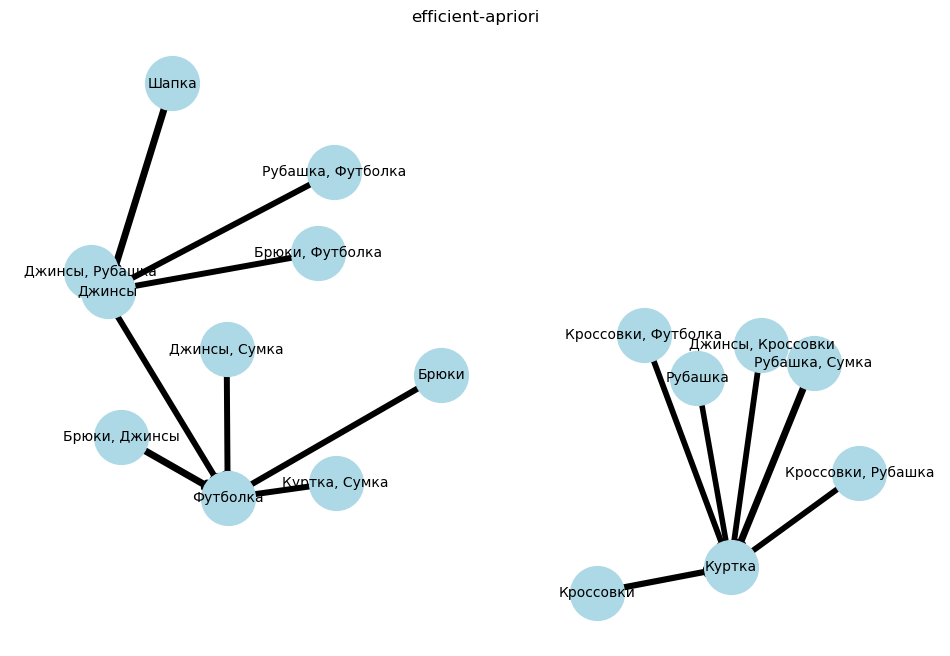

In [61]:
itemsets, rules = apriori(transactions, min_support=min_sup, min_confidence=0.8)

print("\nАссоциативные правила (достоверность ≥ 80%):")
for rule in rules:
    print(rule)

rules_data = []
for r in rules:
    rules_data.append({
        'antecedent': tuple(r.lhs),
        'consequent': tuple(r.rhs),
        'confidence': r.confidence
    })

draw_rules_graph(rules_data, title="efficient-apriori")


fpgrowth_py


Ассоциативные правила (достоверность ≥ 60%):
[{'Шапка'}, {'Джинсы'}, 1.0]
[{'Брюки'}, {'Сумка'}, 0.625]
[{'Брюки'}, {'Джинсы'}, 0.75]
[{'Брюки'}, {'Футболка', 'Джинсы'}, 0.75]
[{'Джинсы', 'Брюки'}, {'Футболка'}, 1.0]
[{'Футболка', 'Брюки'}, {'Джинсы'}, 0.8571428571428571]
[{'Брюки'}, {'Футболка'}, 0.875]
[{'Кроссовки'}, {'Рубашка'}, 0.6666666666666666]
[{'Куртка', 'Рубашка'}, {'Кроссовки'}, 0.625]
[{'Куртка', 'Кроссовки'}, {'Рубашка'}, 0.625]
[{'Рубашка', 'Кроссовки'}, {'Куртка'}, 0.8333333333333334]
[{'Кроссовки'}, {'Джинсы'}, 0.6666666666666666]
[{'Джинсы', 'Куртка'}, {'Кроссовки'}, 0.625]
[{'Джинсы', 'Кроссовки'}, {'Куртка'}, 0.8333333333333334]
[{'Куртка', 'Кроссовки'}, {'Джинсы'}, 0.625]
[{'Кроссовки'}, {'Футболка'}, 0.6666666666666666]
[{'Футболка', 'Куртка'}, {'Кроссовки'}, 0.625]
[{'Футболка', 'Кроссовки'}, {'Куртка'}, 0.8333333333333334]
[{'Куртка', 'Кроссовки'}, {'Футболка'}, 0.625]
[{'Куртка'}, {'Кроссовки'}, 0.6666666666666666]
[{'Кроссовки'}, {'Куртка'}, 0.888888888888888

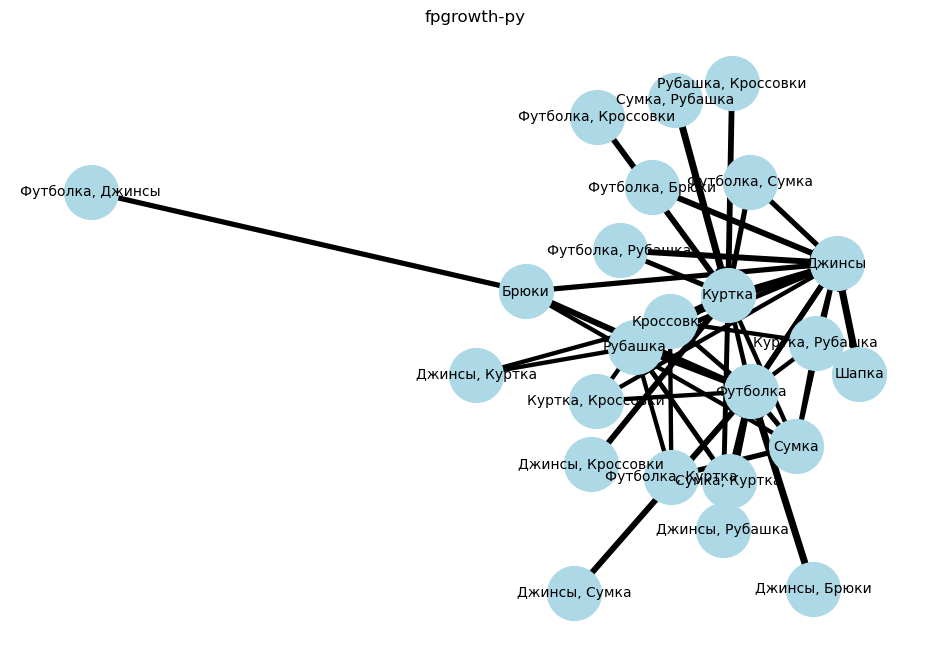

In [62]:
from fpgrowth_py import fpgrowth
start = time.time()
freqItemSet, rules = fpgrowth(transactions, minSupRatio=min_sup, minConf=0.6)
times['fpgrowth-py'] = time.time() - start

print("\nАссоциативные правила (достоверность ≥ 60%):")
for rule in rules:
    print(rule)

rules_data_fp = []
for r in rules:
    lhs = r[0]
    rhs = r[1]
    conf = r[2]
    sup = 0
    rules_data_fp.append({
        'antecedent': tuple(lhs),
        'consequent': tuple(rhs),
        'confidence': conf
    })

draw_rules_graph(rules_data_fp, title="fpgrowth-py")



Ассоциативные правила (достоверность ≥ 80%):
[{'Шапка'}, {'Джинсы'}, 1.0]
[{'Джинсы', 'Брюки'}, {'Футболка'}, 1.0]
[{'Футболка', 'Брюки'}, {'Джинсы'}, 0.8571428571428571]
[{'Брюки'}, {'Футболка'}, 0.875]
[{'Рубашка', 'Кроссовки'}, {'Куртка'}, 0.8333333333333334]
[{'Джинсы', 'Кроссовки'}, {'Куртка'}, 0.8333333333333334]
[{'Футболка', 'Кроссовки'}, {'Куртка'}, 0.8333333333333334]
[{'Кроссовки'}, {'Куртка'}, 0.8888888888888888]
[{'Сумка', 'Рубашка'}, {'Куртка'}, 1.0]
[{'Футболка', 'Рубашка'}, {'Джинсы'}, 0.8571428571428571]
[{'Джинсы', 'Рубашка'}, {'Футболка'}, 0.8571428571428571]
[{'Сумка', 'Куртка'}, {'Футболка'}, 0.8571428571428571]
[{'Джинсы', 'Сумка'}, {'Футболка'}, 0.8571428571428571]


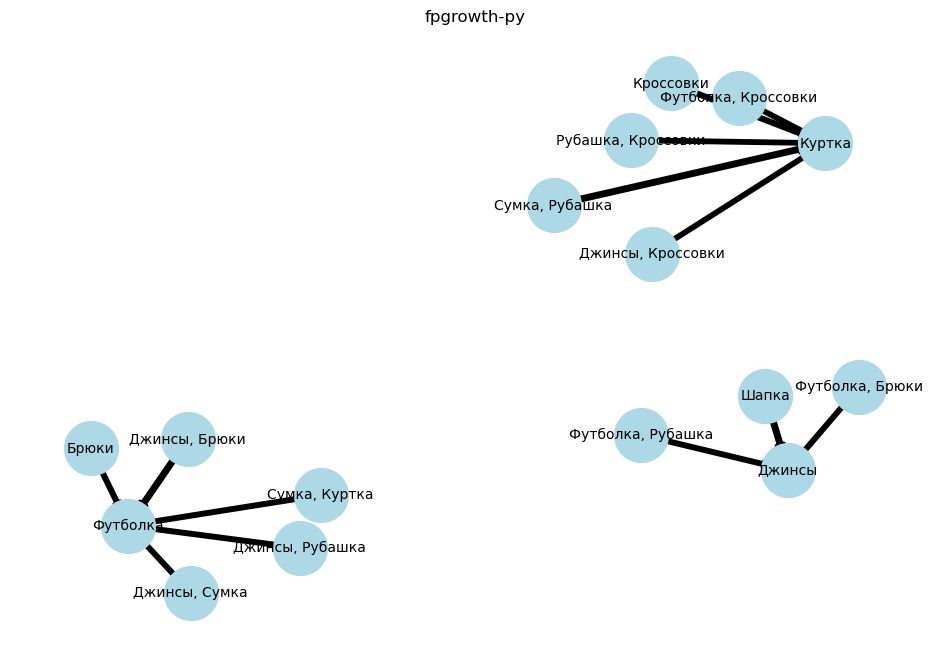

In [63]:
freqItemSet, rules = fpgrowth(transactions, minSupRatio=min_sup, minConf=0.8)


print("\nАссоциативные правила (достоверность ≥ 80%):")
for rule in rules:
    print(rule)

rules_data_fp = []
for r in rules:
    lhs = r[0]
    rhs = r[1]
    conf = r[2]
    sup = 0
    rules_data_fp.append({
        'antecedent': tuple(lhs),
        'consequent': tuple(rhs),
        'confidence': conf
    })

draw_rules_graph(rules_data_fp, title="fpgrowth-py")


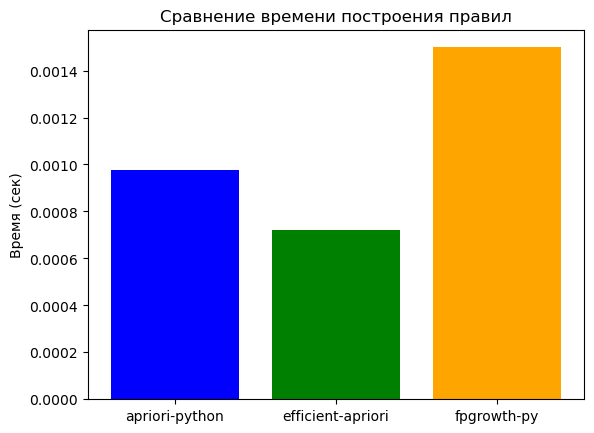

In [64]:
plt.bar(times.keys(), times.values(), color=['blue','green','orange'])
plt.ylabel("Время (сек)")
plt.title("Сравнение времени построения правил")
plt.show()